In [1]:
from scipy.signal import spectrogram
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib as plt

In [11]:
#this code box is for testing 
import glob
from scipy.io import wavfile

r"""
Update the folder path to reflect your own !!!
-Add \*wav at the end of your path to access each individual file 
ex. # folder_path = "path/to/your/folder/*.wav"
"""
folder_path=r"C:\Users\yusle\OSINModels2\wmms_audio\*.wav"


for file_path in glob.glob(folder_path):
    # fs, data = wavfile.read(file_path)
    fs,x=wavfile.read(file_path)

    print("File:", file_path)
    print("Sample rate:", fs)
    print("Shape:", x.shape)

    #Time Domain Data (x X time)
    # plt.plot(x)
    # plt.xlabel('Time')
    # plt.ylabel('Amp')

File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00000.wav
Sample rate: 16000
Shape: (48743,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00001.wav
Sample rate: 16000
Shape: (39450,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00002.wav
Sample rate: 16000
Shape: (167400,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00003.wav
Sample rate: 16000
Shape: (11344,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00004.wav
Sample rate: 16000
Shape: (9713,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00005.wav
Sample rate: 16000
Shape: (5449,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00006.wav
Sample rate: 16000
Shape: (328982,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00007.wav
Sample rate: 16000
Shape: (32055,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00008.wav
Sample rate: 16000
Shape: (20967,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00009.wav
Sample rate: 16000
Shape: (16672,)
File: C:\Users\yusle\OSINModels2\wmms_audio\clip_00010.wav
S

In [8]:
#Create Folder for storing images
import os
#creates folder for spectrogram images 
IMGFolderName="Sectrogram_IMG"
os.makedirs(IMGFolderName, exist_ok=True)

<>:8: SyntaxWarning: invalid escape sequence '\*'
<>:8: SyntaxWarning: invalid escape sequence '\*'
C:\Users\yusle\AppData\Local\Temp\ipykernel_24164\3833962858.py:8: SyntaxWarning: invalid escape sequence '\*'
  """


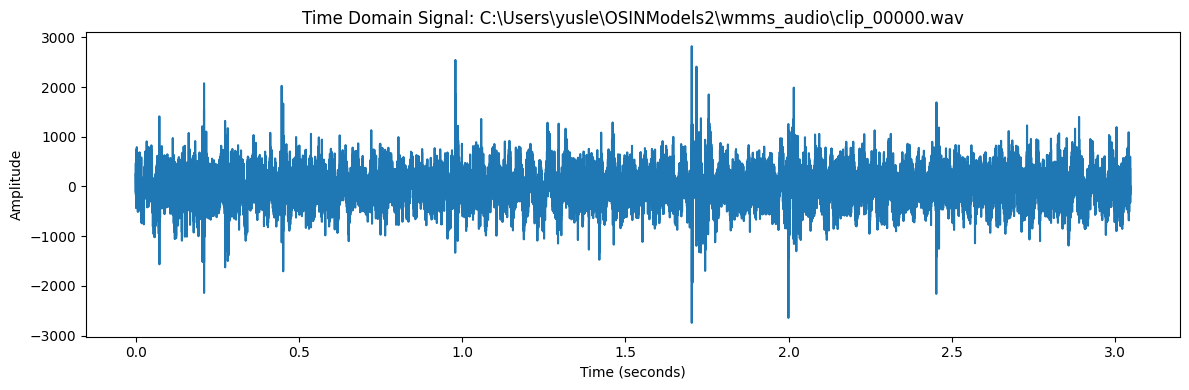

Sectrogram_IMG/spectrogram1.png Was created!


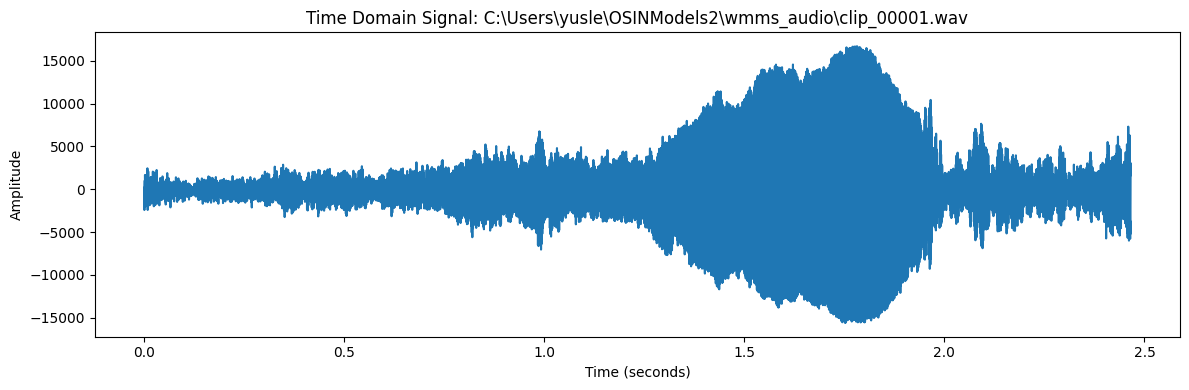

Sectrogram_IMG/spectrogram2.png Was created!


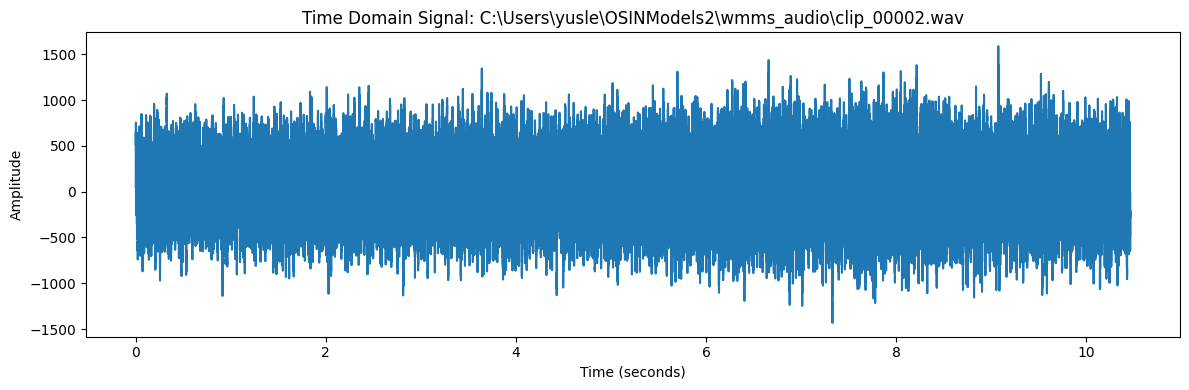

Sectrogram_IMG/spectrogram3.png Was created!


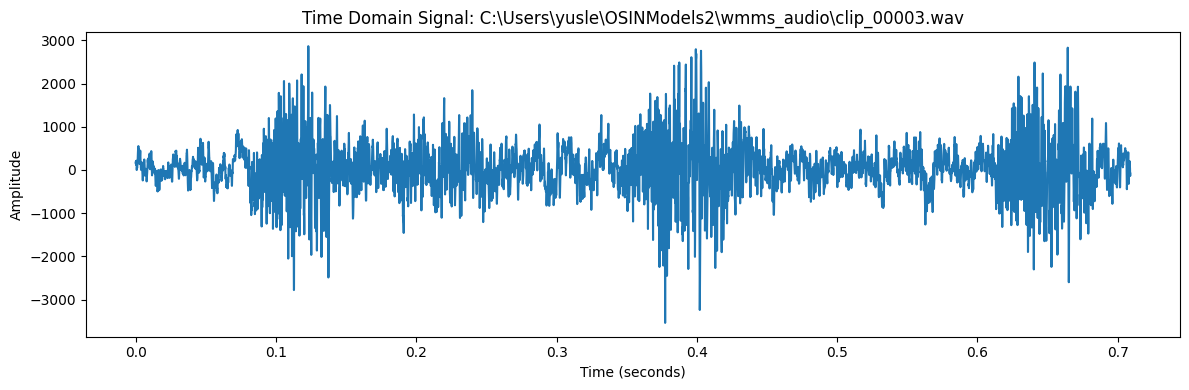

Sectrogram_IMG/spectrogram4.png Was created!


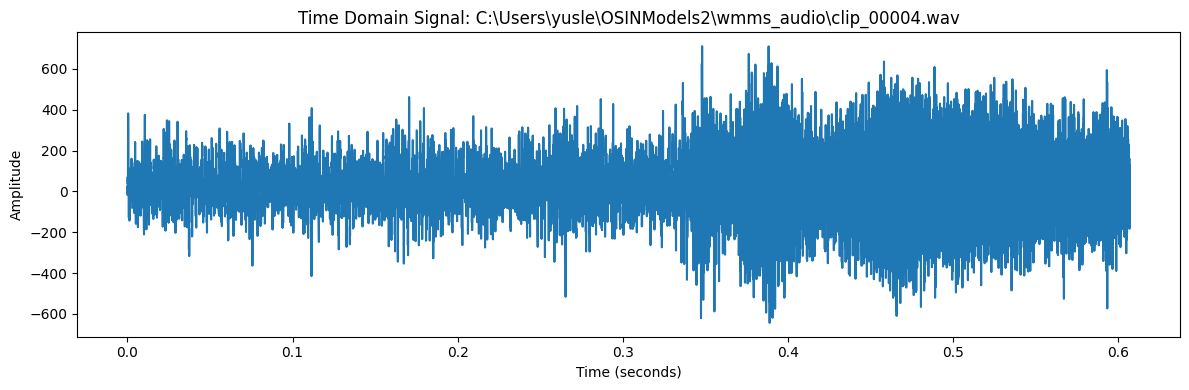

Sectrogram_IMG/spectrogram5.png Was created!


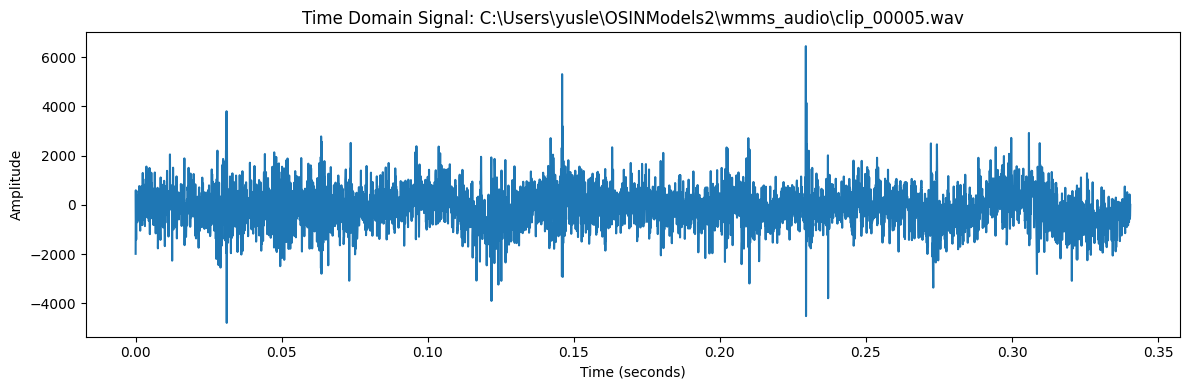

Sectrogram_IMG/spectrogram6.png Was created!


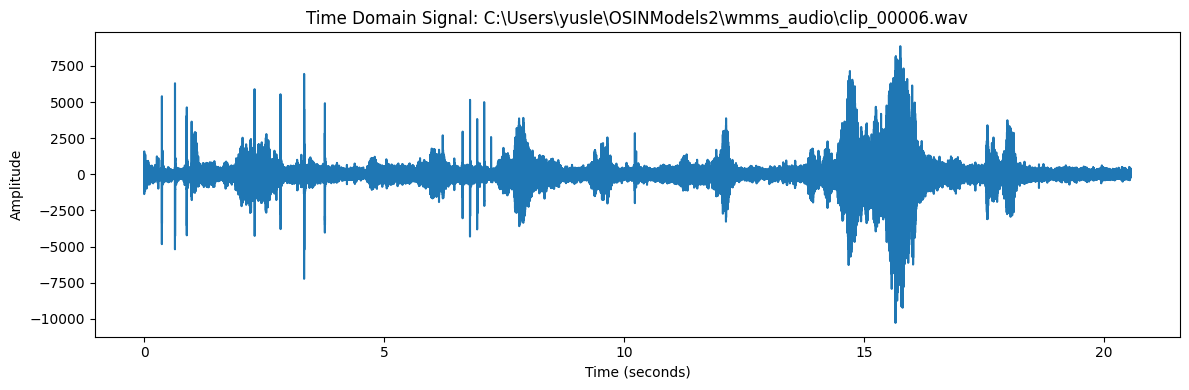

Sectrogram_IMG/spectrogram7.png Was created!


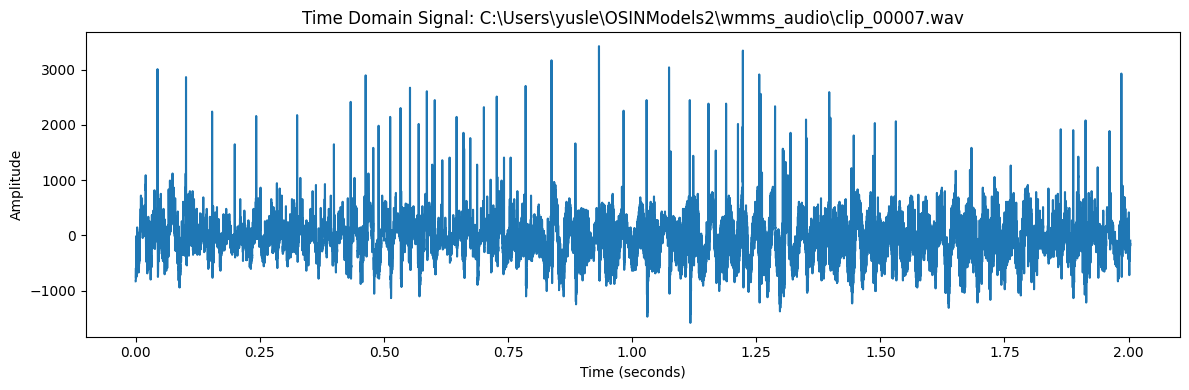

Sectrogram_IMG/spectrogram8.png Was created!


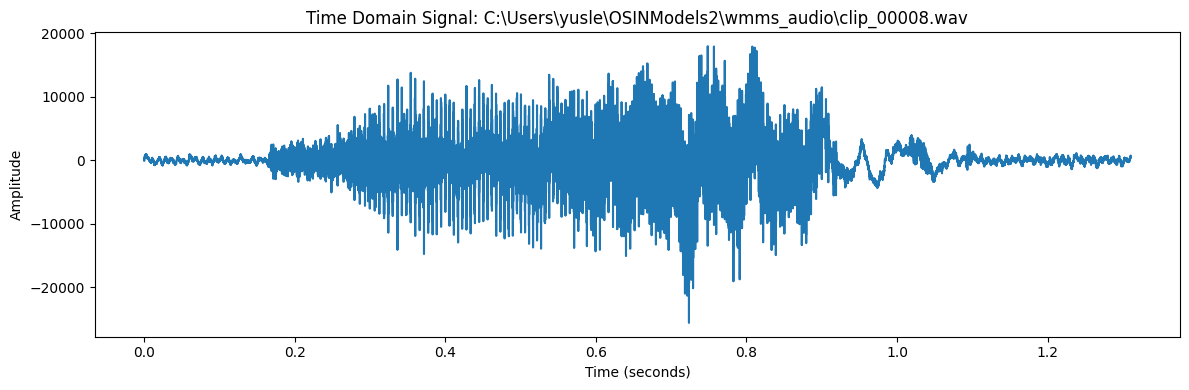

Sectrogram_IMG/spectrogram9.png Was created!
Sectrogram_IMG/spectrogram10.png Was created!
Sectrogram_IMG/spectrogram11.png Was created!
Sectrogram_IMG/spectrogram12.png Was created!
Sectrogram_IMG/spectrogram13.png Was created!
Sectrogram_IMG/spectrogram14.png Was created!
Sectrogram_IMG/spectrogram15.png Was created!
Sectrogram_IMG/spectrogram16.png Was created!
Sectrogram_IMG/spectrogram17.png Was created!
Sectrogram_IMG/spectrogram18.png Was created!
Sectrogram_IMG/spectrogram19.png Was created!
Sectrogram_IMG/spectrogram20.png Was created!
Sectrogram_IMG/spectrogram21.png Was created!
Sectrogram_IMG/spectrogram22.png Was created!
Sectrogram_IMG/spectrogram23.png Was created!
Sectrogram_IMG/spectrogram24.png Was created!
Sectrogram_IMG/spectrogram25.png Was created!
Sectrogram_IMG/spectrogram26.png Was created!
Sectrogram_IMG/spectrogram27.png Was created!
Sectrogram_IMG/spectrogram28.png Was created!
Sectrogram_IMG/spectrogram29.png Was created!
Sectrogram_IMG/spectrogram30.png Wa

In [ ]:
#Code box that actually converts the audio into images of spectrograms 
#Library Imports 
import glob
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np

r"""
Update the folder path to reflect your own !!!
-Add \*wav at the end of your path to access each individual file 
ex. # folder_path = "path/to/your/folder/*.wav"
"""

#folder path for sound files
folder_path=r"C:\Users\yusle\OSINModels2\wmms_audio\*.wav"

#counter for file saving 
i=1

#loop for accessing file paths in specified folder path 
for file_path in glob.glob(folder_path):
    
    # Read WAV file
    fs, x = wavfile.read(file_path)

    # If stereo → convert to mono
    if len(x.shape) > 1:
        x = x.mean(axis=1)

    # Create time axis
    t = np.arange(len(x)) / fs

    # Plot time domain for first 10
    if i<10:
        plt.figure(figsize=(12, 4))
        plt.plot(t, x)
        plt.title(f"Time Domain Signal: {file_path}")
        plt.xlabel("Time (seconds)")
        plt.ylabel("Amplitude")
        plt.tight_layout()
        plt.show()

    #NFFT  is the fourier transform, that handles data not evenly spaced in time 
    nfft=512
    y=np.abs(fft(x,nfft))
    y=y[:nfft//2]

    #This creates the frequency values (x-axis) for a one-sided FFT spectrum.
    f = np.arange(0, nfft /2) * fs / nfft
    #Frequency Domain (Mag X Freq)
    # plt.plot(f,y)
    # plt.title('Frequency Domain')
    # plt.xlabel('frequency')
    # plt.ylabel('Mag')

    #creating spectrogram using library imported function 
    f, t, Sxx = spectrogram(x, fs)
    #Plotting Raw Spectrogram 
    # plt.pcolormesh(t,f,10*np.log10(Sxx))
    # plt.ylabel('Frequency')
    # plt.xlabel('Time [sec]')
    # plt.title('Spectrogram')
    
    """
    !Note to self change masking freq_max to improve model performance if necessary!  
    """
    #Masking Spectrogram
    freq_min=0
    freq_max=8000
    f_mask=(f>=freq_min)&(f<=freq_max)
    Sxx=Sxx[f_mask,:] #masking / isolating the sound 
    f = f[f_mask]  

    plt.pcolormesh(t,f,10*np.log10(Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spectrogram')
    plt.savefig(f"{IMGFolderName}/spectrogram{i}.png")   # Save image
    plt.close()  # 👈 prevents display + frees memory
    print(f"{IMGFolderName}/spectrogram{i}.png Was created!")
    i=i+1







